In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


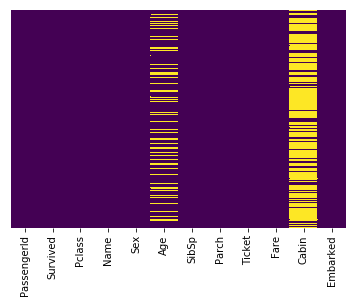

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [5]:
sns.set_style("whitegrid")

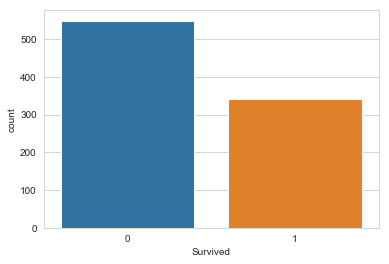

In [6]:
sns.countplot(data=train,x="Survived")

In [7]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

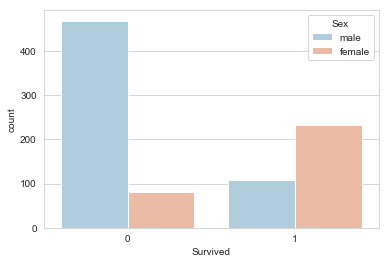

In [8]:
sns.countplot(x="Survived",data=train,hue="Sex",palette="RdBu_r")

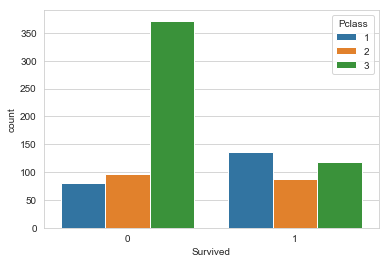

In [9]:
sns.countplot(x="Survived",data=train,hue="Pclass")

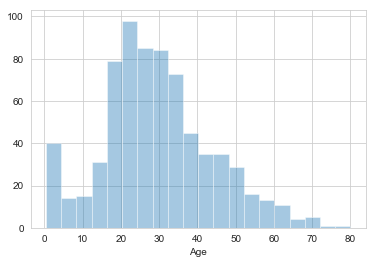

In [10]:
sns.distplot(train["Age"].dropna(),kde=False)

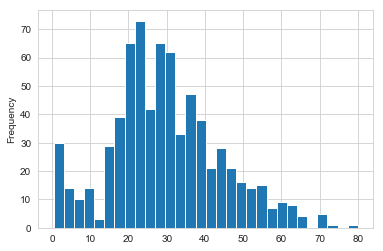

In [11]:
train["Age"].plot.hist(bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


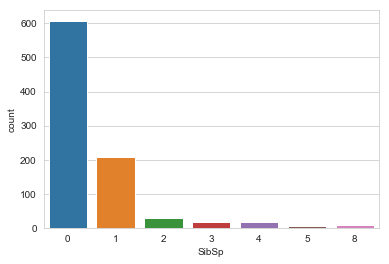

In [13]:
sns.countplot(x="SibSp",data=train)

In [14]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

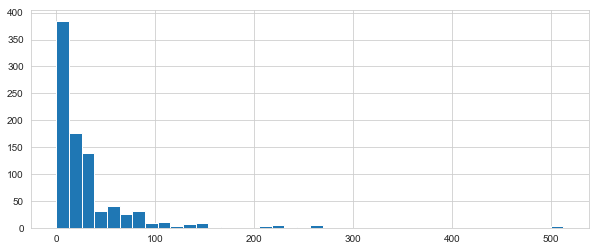

In [15]:

train["Fare"].hist(bins=40,figsize=(10,4))

In [16]:
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
train["Fare"].iplot(kind="hist",bins=50)

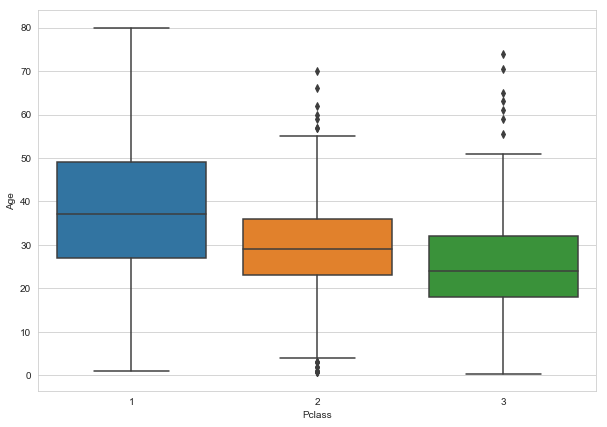

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [20]:
box_age = train[['Pclass', 'Age']]
box_age.pivot(columns='Pclass', values='Age').iplot(kind='box')

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [22]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age,axis=1)

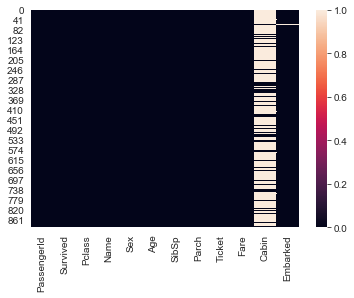

In [23]:
sns.heatmap(train.isnull())

In [24]:
train.drop("Cabin",axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
train.dropna(inplace=True)

In [27]:
sex = pd.get_dummies(train["Sex"],drop_first=True)

In [28]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [29]:
embark = pd.get_dummies(train["Embarked"],drop_first=True)

In [30]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [31]:
train = pd.concat([train,sex,embark], axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [33]:
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
train.drop("PassengerId",axis=1,inplace=True)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
male        889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [37]:
X = train.drop("Survived",axis=1)
y = train["Survived"]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

c:\users\aminu israel\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)